<i><span style="color:#e74c3c;"><b>MAIN GOAL: </b> I tried <b>Google's DePlot</b> for extracting information from a graph and converting a table.</span></i>


## Model Pipeline

The end to end pipeline has several steps; firstly, choosing a random image and a corresponding description, then this input is sent to the DePlot model. Finally, creating a basic table using the output of the DePlot. 

<span style="color:#3498db;"> <b> A Graph + A Description of the graph -> An Extracted Table </b> </span>


## Predictions
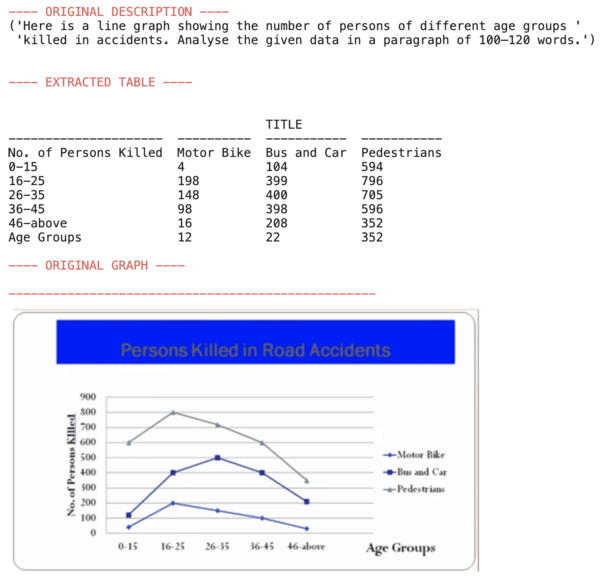


## My Another Projects
* [Disease Article Topic Modelling w/BERTopic](https://www.kaggle.com/code/banddaniel/disease-article-topic-modelling-w-bertopic)
* [Spam vs Ham Message w/ Gemma 7B Fine-Tuning (LoRA)](https://www.kaggle.com/code/banddaniel/spam-vs-ham-message-w-gemma-7b-fine-tuning-lora)
* [Diamond Detect w/Hybrid Model (ViT,CatBoost,SHAP)](https://www.kaggle.com/code/banddaniel/diamond-detect-w-hybrid-model-vit-catboost-shap)


In [1]:
# Importing dependencies

import os
import warnings
warnings.filterwarnings('ignore')
import cv2
import matplotlib.pyplot as plt
import pprint
from tabulate import tabulate
import numpy as np
from colorama import Fore, Back, Style
import time
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration

%matplotlib inline

In [2]:
# a function for creating all paths

def create_full_path_list(path):
    full_paths = []
    paths = sorted(os.listdir(path))
    for i in paths:
        full_paths.append(os.path.join(path, i))
    return full_paths


# creating image and description paths
img_paths = create_full_path_list('/kaggle/input/generate-analytical-writings-from-graphical-data/Inputs/Images')
text_paths = create_full_path_list('/kaggle/input/generate-analytical-writings-from-graphical-data/Inputs/Decriptions')

# <span style="color:#e74c3c;"> Graph to Table </span> Pipeline w/DePlot

In [3]:
processor = Pix2StructProcessor.from_pretrained('/kaggle/input/deplot/pytorch/deplot/1')
model = Pix2StructForConditionalGeneration.from_pretrained('/kaggle/input/deplot/pytorch/deplot/1')

2024-04-01 16:29:03.619792: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 16:29:03.619894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 16:29:03.721562: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# pipeline function
def create_plot_to_table_pipeline(image_paths = img_paths, description_paths = text_paths, SEED:int = 99) -> None:
        
    # create a random id
    np.random.seed(SEED)
    idx = np.random.randint(0,len(image_paths))
    
    # reading image and description
    image = cv2.imread(image_paths[idx])
    text = open(description_paths[idx],"r").read()
    
    print(Fore.RED + '---- ORIGINAL DESCRIPTION ----' + Style.RESET_ALL)
    pprint.pprint(text)
    print('\n')
    
    # inputs
    inputs = processor(images=image, text=text, return_tensors="pt")
    
    # prediction
    predictions = model.generate(**inputs, max_new_tokens=256)
    
    # decoding the output and convert to a table
    raw_output = processor.decode(predictions[0], skip_special_tokens=True)
    split_by_newline = raw_output.split("<0x0A>")
    result_array = []
    
    for item in split_by_newline:
        result_array.append([x.strip() for x in item.split("|")])    
    
    print(Fore.RED + '---- EXTRACTED TABLE ----'+ Style.RESET_ALL)
    print(tabulate(result_array, headers="firstrow"))
    
    print('\n' + Fore.RED + '---- ORIGINAL GRAPH ----')
    plt.imshow(image)
    plt.axis('off')

# <span style="color:#e74c3c;"> Predictions </span>

---- ORIGINAL DESCRIPTION ----
('Here is a line graph showing the number of persons of different age groups '
 'killed in accidents. Analyse the given data in a paragraph of 100–120 words.')




Arial.TTF:   0%|          | 0.00/276k [00:00<?, ?B/s]

---- EXTRACTED TABLE ----
                                   TITLE
---------------------  ----------  -----------  -----------
No. of Persons Killed  Motor Bike  Bus and Car  Pedestrians
0-15                   4           104          594
16-25                  198         399          796
26-35                  148         400          705
36-45                  98          398          596
46-above               16          208          352
Age Groups             12          22           352

---- ORIGINAL GRAPH ----


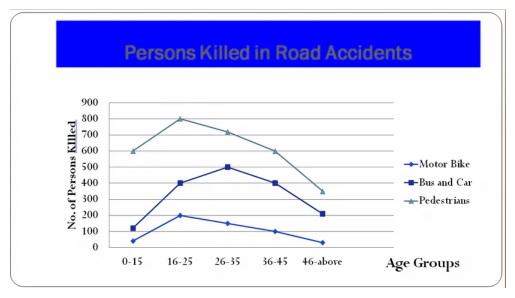

In [5]:
# an example
create_plot_to_table_pipeline(SEED = 12)

---- ORIGINAL DESCRIPTION ----
('The graph given shows estimated sales of gold in Dubai in 2002. Write an '
 'analytical paragraph describing the line graph in around 150 words.')


---- EXTRACTED TABLE ----
TITLE    Dubai Gold Sales 2002
-------  -----------------------
Year     Dubai Gold Sales
Jan      199.12
Feb      225.53
Mar      350.08
Apr      248.23
May      199.61
Jun      158.52
Jul      118.90
Aug      207.95
Sep      117.69
Oct      178.06
Nov      178.06
Dec      189.63

---- ORIGINAL GRAPH ----


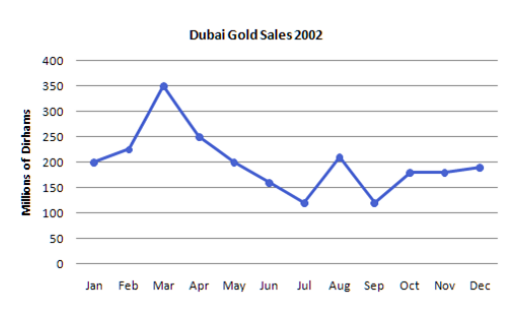

In [6]:
# an example
create_plot_to_table_pipeline(SEED = 23)

---- ORIGINAL DESCRIPTION ----
('Study the chart given below, which is the result of the survey conducted in '
 'the public schools and government schools of Vadodara. This depicts the '
 'types of activities the teenagers (Age 13- 19 years are involved during '
 'their leisure time). Complete the summary in about 80 words.')


---- EXTRACTED TABLE ----
TITLE
-----------  -----
Watching TV  30.0%
Net Surfing  52.0%
Cell Phone   21.0%
Friends      21.0%

---- ORIGINAL GRAPH ----


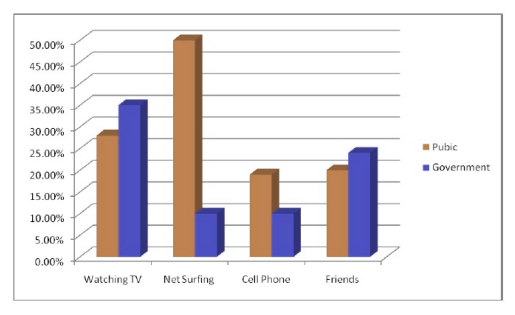

In [7]:
# an example
create_plot_to_table_pipeline(SEED = 326)

---- ORIGINAL DESCRIPTION ----
('A research was conducted in order to see the maturity gap between young '
 'people of 15-35 years old and older people of 36-60 years old. The '
 'respondents were asked which of the following was the most important in '
 'order to be successful in life. Conceptualise the given result in an '
 'analytical paragraph having 150-200 words.')


---- EXTRACTED TABLE ----
              TITLE
------------  -------  -----
              Younger  Older
Hard work     16.7%    57.4%
Talent        22.2%    28.2%
Honesty       12.7%    12.9%
Intelligence  12.9%    12.9%
Luck          12.9%    12.9%
Contacts      12.9%    12.5%
money         12.9%    12.9%

---- ORIGINAL GRAPH ----


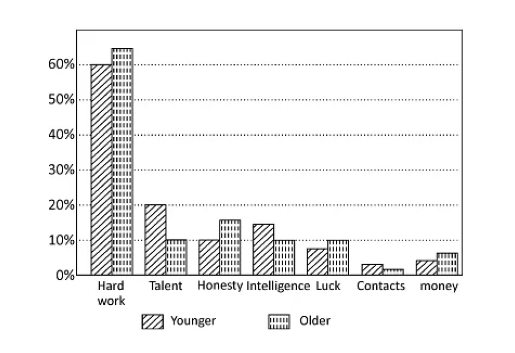

In [8]:
# an example
create_plot_to_table_pipeline(SEED = 92)